# Make a simple Convolutional network for the bus data

## Initialization

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../misc')
sys.path.append("../")
from MoviaBusDataset import MoviaBusDataset
from BaseNetwork import BaseNetwork
import torch
from torch.nn import Linear, Sequential, ReLU, L1Loss
from torch.optim import Adam, lr_scheduler
import numpy as np

## Import data using the MoviaBusDataset

In [163]:
previous_timesteps = 6
prediction_steps = 6
batch_size = 25


train = MoviaBusDataset('../data/train', interpolation=True, 
                        prev_timesteps=previous_timesteps, 
                        max_future_time_steps=prediction_steps)
validation = MoviaBusDataset('../data/validation', interpolation=True, 
                       prev_timesteps=previous_timesteps, 
                       max_future_time_steps=prediction_steps)
test = MoviaBusDataset('../data/test', interpolation=True, 
                       prev_timesteps=previous_timesteps, 
                       max_future_time_steps=prediction_steps)

In [164]:
train.remove_trend()
validation.remove_trend(train._historical_average)
test.remove_trend(train._historical_average)

In [201]:
test.dataframes[0]['LinkRef']

KeyError: 'LinkRef'

## The Model

In [189]:
#from IPython.core.debugger import Tracer; Tracer()()
#%pdb 0

from CNN_2 import CNN as CNN_2 #, GCN
from CNN import CNN 
from FNN import FNN
cnn = CNN_2(previous_timesteps)

#cnn = GCN(nfeat=previous_timesteps + 1, 
#          nhid=100, 
#          nout=1, 
#          dropout=0.3)



## Training the network

In [190]:
#%pdb 0
cnn.train_network(train, validation,batch_size=batch_size, 
                  num_epochs=30,
                  optimizer_fun=lambda param : Adam(param, lr=1e-2, weight_decay=1e-4),
                  scheduler_fun=lambda optim : lr_scheduler.StepLR(optim, step_size=10, gamma=0.1),
                  criterion=L1Loss())

epoch =  0  train loss = 1.428   validation loss = 1.589   output_std = 0.112
Model saved as CNN.pt
epoch =  2  train loss = 1.424   validation loss = 1.587   output_std = 0.149
Model saved as CNN.pt
epoch =  4  train loss = 1.420   validation loss = 1.586   output_std = 0.189
Model saved as CNN.pt
epoch =  6  train loss = 1.418   validation loss = 1.586   output_std = 0.202
Model saved as CNN.pt
epoch =  8  train loss = 1.416   validation loss = 1.586   output_std = 0.214
Model saved as CNN.pt
epoch = 10  train loss = 1.415   validation loss = 1.585   output_std = 0.232
Model saved as CNN.pt
epoch = 12  train loss = 1.408   validation loss = 1.587   output_std = 0.255
epoch = 14  train loss = 1.405   validation loss = 1.588   output_std = 0.274
epoch = 16  train loss = 1.403   validation loss = 1.588   output_std = 0.286
epoch = 18  train loss = 1.401   validation loss = 1.588   output_std = 0.294
epoch = 20  train loss = 1.400   validation loss = 1.588   output_std = 0.301
epoch = 22

In [169]:
fnn = FNN(num_hidden=20,previous_timesteps=previous_timesteps)

optimizer_fun = lambda param : Adam(param, lr=1e-2, weight_decay=0)
scheduler_fun = lambda optim : lr_scheduler.StepLR(optim, step_size=25, gamma=0.1)
criterion = L1Loss()
fnn.train_network(train, validation,batch_size=batch_size, 
                  num_epochs=100,
                  optimizer_fun=optimizer_fun,
                  scheduler_fun=scheduler_fun,
                  criterion=criterion)

epoch =  0  train loss = 1.404   validation loss = 1.534   output_std = 0.585
Model saved as FNN.pt
epoch =  2  train loss = 1.394   validation loss = 1.528   output_std = 0.656
Model saved as FNN.pt
epoch =  4  train loss = 1.392   validation loss = 1.526   output_std = 0.700
Model saved as FNN.pt
epoch =  6  train loss = 1.391   validation loss = 1.525   output_std = 0.711
Model saved as FNN.pt
epoch =  8  train loss = 1.390   validation loss = 1.524   output_std = 0.729
Model saved as FNN.pt
epoch = 10  train loss = 1.389   validation loss = 1.524   output_std = 0.739
Model saved as FNN.pt
epoch = 12  train loss = 1.388   validation loss = 1.523   output_std = 0.742
Model saved as FNN.pt
epoch = 14  train loss = 1.388   validation loss = 1.523   output_std = 0.745
Model saved as FNN.pt
epoch = 16  train loss = 1.388   validation loss = 1.523   output_std = 0.745
epoch = 18  train loss = 1.387   validation loss = 1.523   output_std = 0.744
Model saved as FNN.pt
epoch = 20  train loss

In [117]:
a = torch.Tensor(2,4)
print(a.shape)
a = a.unsqueeze(1)
print(a.shape)

torch.Size([2, 4])
torch.Size([2, 1, 4])


## Evaluate the network on a test dataset 

In [151]:
mae_roads = cnn.get_MAE_score(validation,timestep=1,individual_roads=True)

In [152]:
mae_roads_sorted_keys = sorted(range(len(mae_roads)), key=lambda k: mae_roads[k])
print(mae_roads[mae_roads_sorted_keys[0]])
print(mae_roads[mae_roads_sorted_keys[-1]])


0.3750980794429779
5.023514270782471


In [124]:
mae_roads_sorted_keys[-1]

90

In [153]:
mae_roads[mae_roads_sorted_keys]

array([0.37509808, 0.49030373, 0.54904568, 0.57453281, 0.6179812 ,
       0.64788854, 0.67635268, 0.73383993, 0.73415703, 0.76490277,
       0.79741013, 0.81265461, 0.82297236, 0.83728844, 0.84186316,
       0.84414726, 0.85890943, 0.8760739 , 0.87789589, 0.88206929,
       0.88810247, 0.89118379, 0.89928621, 0.90356368, 0.90488869,
       0.91800988, 0.92500329, 0.93402117, 0.94573915, 0.94900596,
       0.9513706 , 0.95189786, 0.95372093, 0.971829  , 0.97198021,
       0.97813457, 0.98256367, 0.9957394 , 0.9972524 , 1.00273526,
       1.00459456, 1.00615656, 1.01253617, 1.05112314, 1.06158078,
       1.07336509, 1.07531559, 1.0805788 , 1.08069849, 1.08729947,
       1.09051597, 1.09996307, 1.11359763, 1.11700833, 1.12823999,
       1.13029051, 1.13942754, 1.14546096, 1.16210389, 1.17007005,
       1.19519556, 1.20077133, 1.20725954, 1.21105564, 1.21647513,
       1.21814859, 1.22101474, 1.22397125, 1.26010644, 1.27547729,
       1.27682698, 1.29755747, 1.30746388, 1.32069635, 1.32119

### Modelled data vs real data for best road segment 

<IPython.core.display.Javascript object>


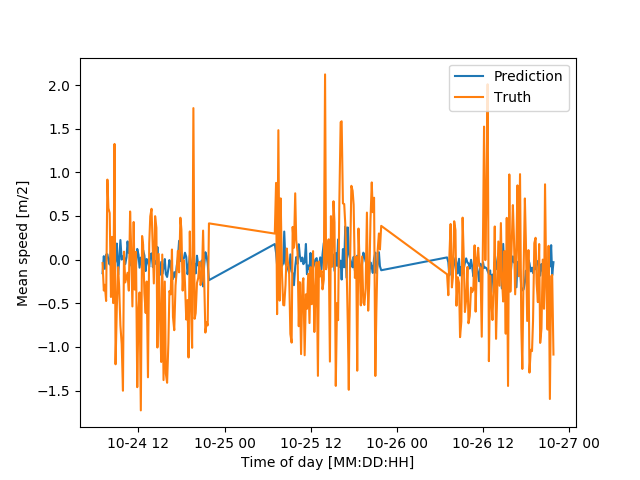

In [193]:
%matplotlib notebook

cnn.visualize_road(dataset=test,timesteps=0, road=mae_roads_sorted_keys[1])

### Modelled data vs real data for worst road segment 

In [ ]:
%matplotlib notebook

fnn.visualize_road(validation,timesteps=1, road=mae_roads_sorted_keys[0])

In [191]:
scores=[cnn.get_MAE_score(test,timestep=i) for i in range(1,prediction_steps+1)]
print(scores)
print(sum(scores)/len(scores))

[1.574589729309082, 1.573410987854004, 1.5732396841049194, 1.5724375247955322, 1.5754449367523193, 1.5761330127716064]
1.5742093125979106
